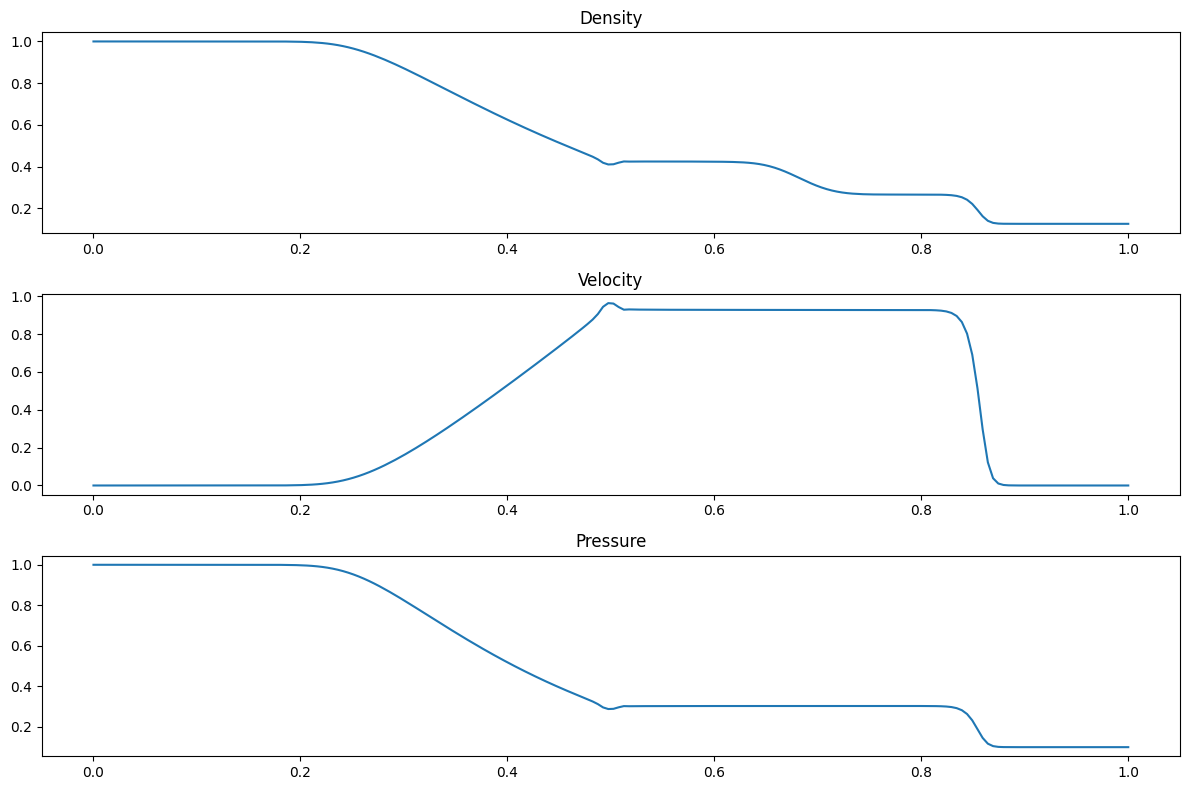

In [8]:
#SOD 激波管

import numpy as np
import matplotlib.pyplot as plt


def roe_flux(UL, UR, gamma=1.4, eps=1e-8):
    
    rhoL = max(UL[0], eps)
    rhoR = max(UR[0], eps)
    
    uL = UL[1]/rhoL
    uR = UR[1]/rhoR
    
    pL = max((gamma-1)*(UL[2] - 0.5*rhoL*uL**2), eps)
    pR = max((gamma-1)*(UR[2] - 0.5*rhoR*uR**2), eps)
    
    HL = (UL[2] + pL)/rhoL
    HR = (UR[2] + pR)/rhoR
    
    sqrt_rhoL = np.sqrt(rhoL)
    sqrt_rhoR = np.sqrt(rhoR)
    sum_sqrt = sqrt_rhoL + sqrt_rhoR + eps
    
    u_roe = (sqrt_rhoL*uL + sqrt_rhoR*uR)/sum_sqrt
    H_roe = (sqrt_rhoL*HL + sqrt_rhoR*HR)/sum_sqrt
    a_roe = np.sqrt(max((gamma-1)*(H_roe - 0.5*u_roe**2), eps))
    
    lambda1 = u_roe - a_roe
    lambda2 = u_roe
    lambda3 = u_roe + a_roe
    
    delta = 0.1*a_roe
    lambda1 = lambda1 - delta*np.sign(lambda1)
    lambda3 = lambda3 + delta*np.sign(lambda3)
    
    absLambda = np.array([np.abs(lambda1), np.abs(lambda2), np.abs(lambda3)])
    
    K = np.array([[1, 1, 1],
                  [u_roe - a_roe, u_roe, u_roe + a_roe],
                  [H_roe - u_roe*a_roe, 0.5*u_roe**2, H_roe + u_roe*a_roe]])
    
    deltaU = UR - UL
    alpha = np.linalg.solve(K, deltaU)
    
    FL = np.array([rhoL*uL, 
                   rhoL*uL**2 + pL, 
                   uL*(UL[2] + pL)])
    
    FR = np.array([rhoR*uR, 
                   rhoR*uR**2 + pR, 
                   uR*(UR[2] + pR)])
    
    return 0.5*(FL + FR) - 0.5*K @ (absLambda * alpha)


nx = 200
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]
gamma = 1.4
cfl = 0.5  
t_end = 0.2

rho = np.where(x < 0.5, 1.0, 0.125)
u = np.zeros_like(x)
p = np.where(x < 0.5, 1.0, 0.1)

U = np.zeros((3, nx))
U[0] = rho
U[1] = rho * u
U[2] = p/(gamma-1) + 0.5*rho*u**2


t = 0
while t < t_end:

    rho = np.clip(U[0], 1e-8, None)
    u = U[1]/rho
    p = np.maximum((gamma-1)*(U[2] - 0.5*rho*u**2), 1e-8)
    a = np.sqrt(gamma*p/rho)
    dt = cfl*dx/(np.max(np.abs(u) + a))
    dt = min(dt, t_end - t)
    
    U_left = np.hstack((U[:,0:1], U))
    U_right = np.hstack((U, U[:,-1:]))
    
    F = np.zeros((3, nx+1))
    for i in range(nx+1):
        F[:,i] = roe_flux(U_left[:,i], U_right[:,i])
    
    U -= dt/dx * (F[:,1:] - F[:,:-1])
    
    U[0] = np.clip(U[0], 1e-8, None)          
    U[2] = np.maximum(U[2], 1e-8)             
    t += dt

rho = U[0]
u = U[1]/rho
p = (gamma-1)*(U[2] - 0.5*rho*u**2)


plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(x, rho)
plt.title('Density')
plt.subplot(312)
plt.plot(x, u)
plt.title('Velocity')
plt.subplot(313)
plt.plot(x, p)
plt.title('Pressure')
plt.tight_layout()
plt.savefig("111.jpg",dpi=600,bbox_inches='tight')
# plt.show()

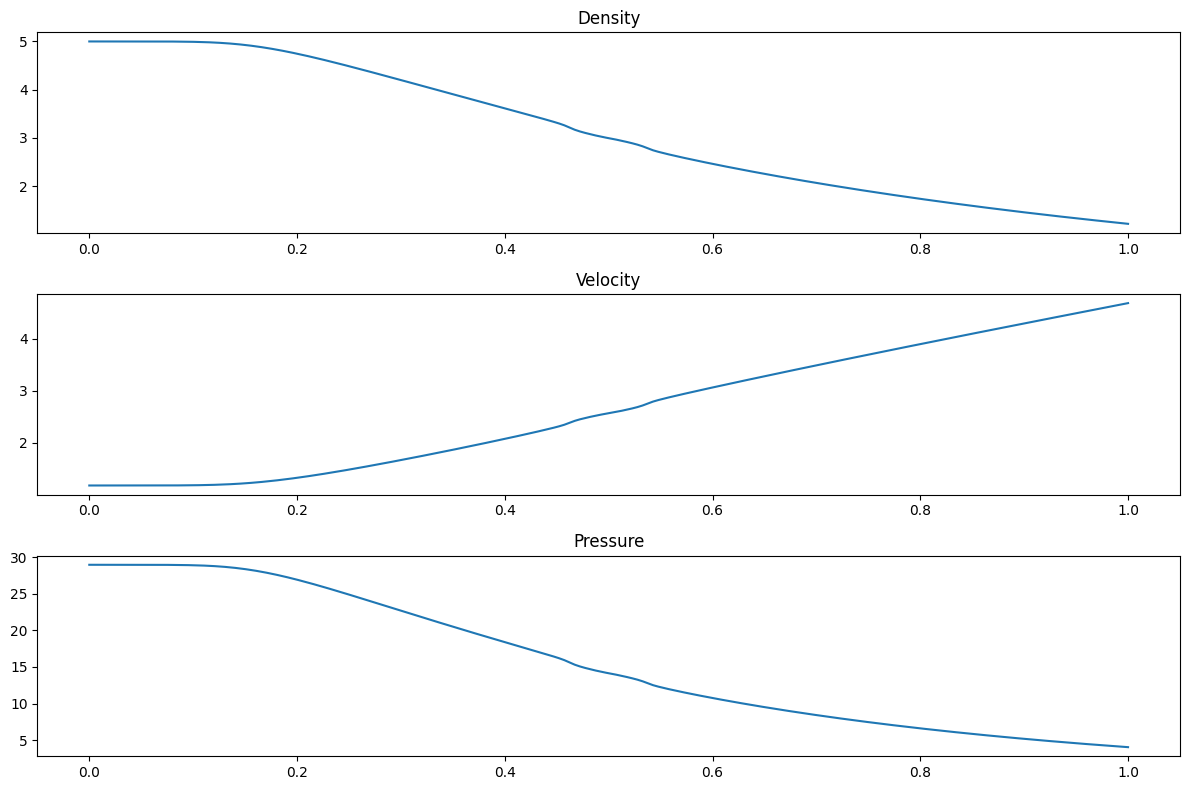

In [9]:
#膨胀激波

import numpy as np
import matplotlib.pyplot as plt


def roe_flux(UL, UR, gamma=1.4, eps=1e-8):
    
    rhoL = max(UL[0], eps)
    rhoR = max(UR[0], eps)
    
    uL = UL[1]/rhoL
    uR = UR[1]/rhoR
    
    pL = max((gamma-1)*(UL[2] - 0.5*rhoL*uL**2), eps)
    pR = max((gamma-1)*(UR[2] - 0.5*rhoR*uR**2), eps)
    
    HL = (UL[2] + pL)/rhoL
    HR = (UR[2] + pR)/rhoR
    
    sqrt_rhoL = np.sqrt(rhoL)
    sqrt_rhoR = np.sqrt(rhoR)
    sum_sqrt = sqrt_rhoL + sqrt_rhoR + eps
    
    u_roe = (sqrt_rhoL*uL + sqrt_rhoR*uR)/sum_sqrt
    H_roe = (sqrt_rhoL*HL + sqrt_rhoR*HR)/sum_sqrt
    a_roe = np.sqrt(max((gamma-1)*(H_roe - 0.5*u_roe**2), eps))
    
    lambda1 = u_roe - a_roe
    lambda2 = u_roe
    lambda3 = u_roe + a_roe
    
    delta = 0.1*a_roe
    lambda1 = lambda1 - delta*np.sign(lambda1)
    lambda3 = lambda3 + delta*np.sign(lambda3)
    
    absLambda = np.array([np.abs(lambda1), np.abs(lambda2), np.abs(lambda3)])
    
    K = np.array([[1, 1, 1],
                  [u_roe - a_roe, u_roe, u_roe + a_roe],
                  [H_roe - u_roe*a_roe, 0.5*u_roe**2, H_roe + u_roe*a_roe]])
    
    deltaU = UR - UL
    alpha = np.linalg.solve(K, deltaU)
    
    FL = np.array([rhoL*uL, 
                   rhoL*uL**2 + pL, 
                   uL*(UL[2] + pL)])
    
    FR = np.array([rhoR*uR, 
                   rhoR*uR**2 + pR, 
                   uR*(UR[2] + pR)])
    
    return 0.5*(FL + FR) - 0.5*K @ (absLambda * alpha)


nx = 200
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]
gamma = 1.4
cfl = 0.5  
t_end = 0.2

rho = np.where(x < 0.5, 5, 1)
u = np.where(x<0.5, np.sqrt(1.4), 5 * np.sqrt(1.4))
p = np.where(x < 0.5, 29.0, 1.0)

U = np.zeros((3, nx))
U[0] = rho
U[1] = rho * u
U[2] = p/(gamma-1) + 0.5*rho*u**2

t = 0
while t < t_end:

    rho = np.clip(U[0], 1e-8, None)
    u = U[1]/rho
    p = np.maximum((gamma-1)*(U[2] - 0.5*rho*u**2), 1e-8)
    a = np.sqrt(gamma*p/rho)
    dt = cfl*dx/(np.max(np.abs(u) + a))
    dt = min(dt, t_end - t)
    
    U_left = np.hstack((U[:,0:1], U))
    U_right = np.hstack((U, U[:,-1:]))
    
    F = np.zeros((3, nx+1))
    for i in range(nx+1):
        F[:,i] = roe_flux(U_left[:,i], U_right[:,i])
    
    U -= dt/dx * (F[:,1:] - F[:,:-1])
    
    U[0] = np.clip(U[0], 1e-8, None)          
    U[2] = np.maximum(U[2], 1e-8)             
    t += dt

rho = U[0]
u = U[1]/rho
p = (gamma-1)*(U[2] - 0.5*rho*u**2)

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(x, rho)
plt.title('Density')
plt.subplot(312)
plt.plot(x, u)
plt.title('Velocity')
plt.subplot(313)
plt.plot(x, p)
plt.title('Pressure')
plt.tight_layout()
plt.savefig("221.jpg",dpi=600,bbox_inches='tight')
# plt.show()

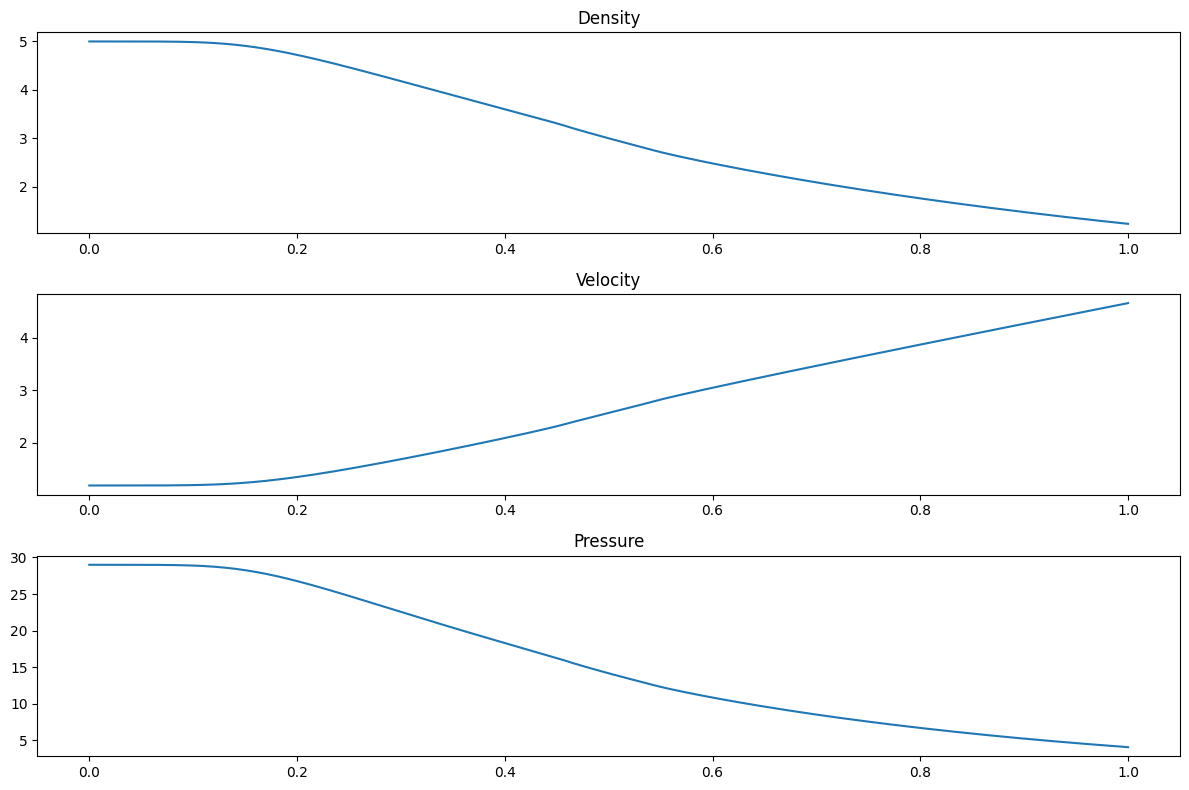

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def roe_flux(UL, UR, gamma=1.4, eps=1e-8):
    
    rhoL = max(UL[0], eps)
    rhoR = max(UR[0], eps)
    
    uL = UL[1]/rhoL
    uR = UR[1]/rhoR
    
    pL = max((gamma-1)*(UL[2] - 0.5*rhoL*uL**2), eps)
    pR = max((gamma-1)*(UR[2] - 0.5*rhoR*uR**2), eps)
    
    HL = (UL[2] + pL)/rhoL
    HR = (UR[2] + pR)/rhoR
    
    sqrt_rhoL = np.sqrt(rhoL)
    sqrt_rhoR = np.sqrt(rhoR)
    sum_sqrt = sqrt_rhoL + sqrt_rhoR + eps
    
    u_roe = (sqrt_rhoL*uL + sqrt_rhoR*uR)/sum_sqrt
    H_roe = (sqrt_rhoL*HL + sqrt_rhoR*HR)/sum_sqrt
    a_roe = np.sqrt(max((gamma-1)*(H_roe - 0.5*u_roe**2), eps))
    
    lambda1 = u_roe - a_roe
    lambda2 = u_roe
    lambda3 = u_roe + a_roe
    
    epsilon = 0.1*a_roe 
    absLambda = np.array([
        np.maximum(np.abs(lambda1), epsilon),
        np.maximum(np.abs(lambda2), epsilon),
        np.maximum(np.abs(lambda3), epsilon)
    ])
    

    K = np.array([[1, 1, 1],
                  [u_roe - a_roe, u_roe, u_roe + a_roe],
                  [H_roe - u_roe*a_roe, 0.5*u_roe**2, H_roe + u_roe*a_roe]])
    
    deltaU = UR - UL
    alpha = np.linalg.solve(K, deltaU)
    
    FL = np.array([rhoL*uL, 
                   rhoL*uL**2 + pL, 
                   uL*(UL[2] + pL)])
    
    FR = np.array([rhoR*uR, 
                   rhoR*uR**2 + pR, 
                   uR*(UR[2] + pR)])
    
    return 0.5*(FL + FR) - 0.5*K @ (absLambda * alpha)

nx = 200
x = np.linspace(0, 1, nx)
dx = x[1] - x[0]
gamma = 1.4
cfl = 0.5
t_end = 0.2

rho = np.where(x < 0.5, 5, 1)
u = np.where(x<0.5, np.sqrt(1.4), 5 * np.sqrt(1.4))
p = np.where(x < 0.5, 29.0, 1.0)

U = np.zeros((3, nx))
U[0] = rho
U[1] = rho * u
U[2] = p/(gamma-1) + 0.5*rho*u**2

t = 0
while t < t_end:

    rho = np.clip(U[0], 1e-8, None)
    u = U[1]/rho
    p = np.maximum((gamma-1)*(U[2] - 0.5*rho*u**2), 1e-8)
    a = np.sqrt(gamma*p/rho)
    dt = cfl*dx/(np.max(np.abs(u) + a))
    dt = min(dt, t_end - t)   

    U_left = np.hstack((U[:,0:1], U))
    U_right = np.hstack((U, U[:,-1:]))
    
    F = np.zeros((3, nx+1))
    for i in range(nx+1):
        F[:,i] = roe_flux(U_left[:,i], U_right[:,i])
    
    # Update solution
    U -= dt/dx * (F[:,1:] - F[:,:-1])
    
    U[0] = np.clip(U[0], 1e-8, None)
    U[2] = np.maximum(U[2], 1e-8)
    t += dt

rho = U[0]
u = U[1]/rho
p = (gamma-1)*(U[2] - 0.5*rho*u**2)

# Plot results
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(x, rho)
plt.title('Density')
plt.subplot(312)
plt.plot(x, u)
plt.title('Velocity')
plt.subplot(313)
plt.plot(x, p)
plt.title('Pressure')
plt.tight_layout()
plt.savefig("222.jpg",dpi=600,bbox_inches='tight')
# plt.show()